# Predicción de precios de casas
Buscamos trabajar con una base de datos de dimensión alta (13 atributos), lo cual trae consigo una variedad de retos interesantes. 

Importamos las bibliotecas usuales y cargamos los datos a un dataframe por el momento. También importamos nuestro paquete de funciones auxiliares custom_routines. Los detalles de este último se puedeb ver en el archivo custom_routines.py.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import own library with custom technical routines
from custom_routines import custom_routines as cr

In [2]:
data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/housing.data", header=None, delim_whitespace=True)
print("Tamaño del conjunto de datos:", len(data),"x", len(data.loc[0]))
data.head(5)

Tamaño del conjunto de datos: 506 x 14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regresión por mínimos cuadrados
Comenzamos con la aplicación de regresión lineal con funciones base polinómicas. Proponemos ajustar a los datos un modelo con 13 variables explicativas y una de respuesta (el precio de las casa). 

Buscamos usar un modelo de la forma
$$ f(\bar x) = a_0+\sum_{i=1}^{13} a_i\Phi(x_i),$$
donde $\Phi(x_i) = x_i + x_i^2+\dots + x_i^d$ ($d$ será compartido por cada $\Phi(x)$). 
Para usar mínimos cuadrados, la función de error asociada al modelo es: 
$$ E(a) = \frac{1}{2}\sum_{j=0}^{505} (y_j-f(\bar x^j)$$

Buscamos la tupla $a = (a_0,a_1,\dots, a_{13})$ que minimize a $E$. Mediante el método de mínimos cuadrados sabemos que tal tupla se puede calcular como:

$$ a_{lsq} = (X^TX)^{-1}X^Ty,$$
donde $X$ es la matriz de $505\times 13$ con todos los valores de las variables dependientes, $X^T$ es su transpuesta, y $y$ es el vector de los valores de la variable respuesta (la última columna en los datos). 

Antes de comenzar con el calculo de $a_{lsq}$, preparamos los datos como matrices. 

In [3]:
# Extrae matriz de features y vector de respuestas
X = data.values[0:,:-1]
y = data.values[0:,-1]
print("El formato de los datos en la matriz de atributos:\n\n", X[:5])
print("\nEl formato del vector de respuestas:", y[:5])

El formato de los datos en la matriz de atributos:

 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]

El formato del vector de respuestas: [24.  21.6 34.7 33.4 36.2]


A continuación graficamos las respuestas contra cada atributo, para ganar un poco de intuición sobre cuáles son siginificativas y poder juzgar nuestros modelos más tarde. Podemos obsevar que los atributos en las columnas 0, 5, 7 y 12 parecen ser importantes para la variable respuesta. 

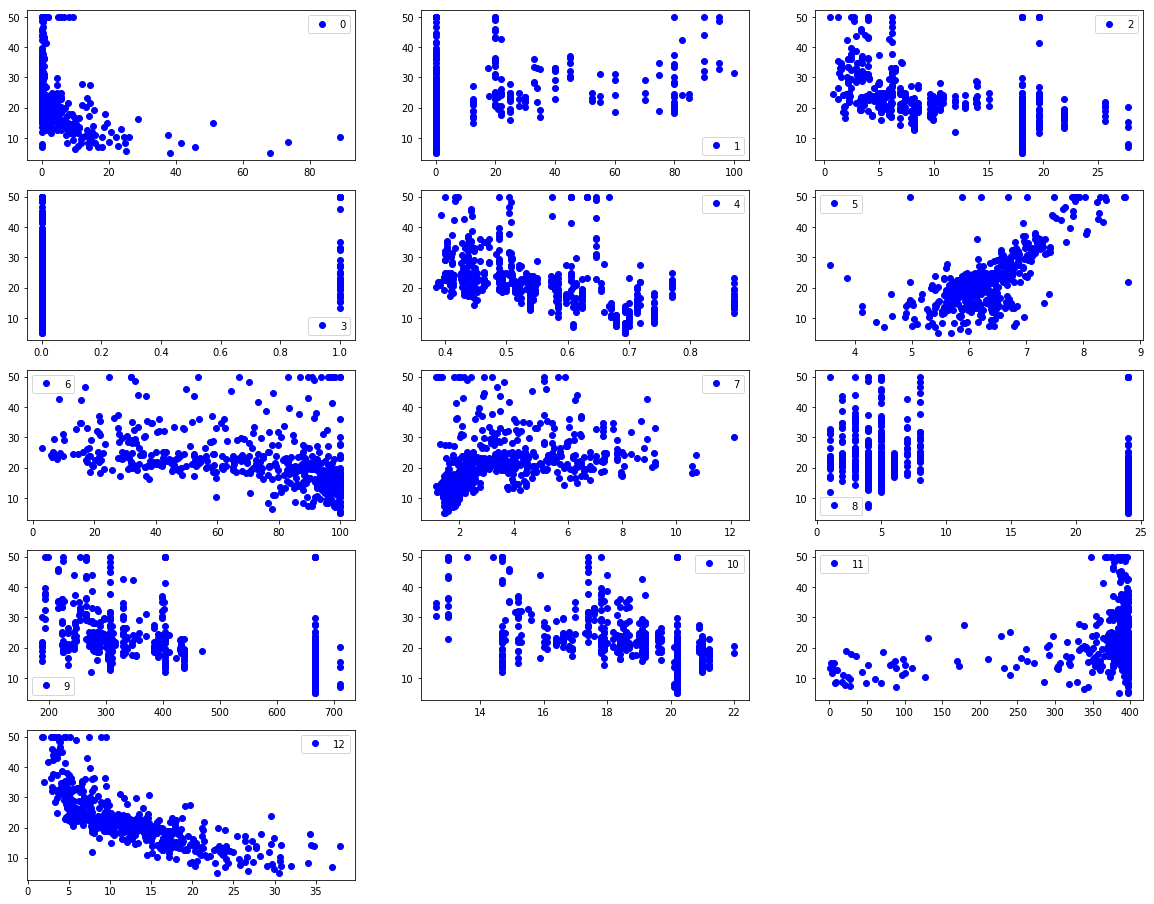

In [4]:
gs = plt.GridSpec(5,3)
fig = plt.figure(figsize=(20,16))
for i in range(0,4): 
    for j in range(0,3):
        fig.add_subplot(gs[i,j]).plot(X[0:,(3*i)+j], y, 'bo', label = (3*i)+j) #%0.4f" % auc_spam_logit
        plt.legend()

fig.add_subplot(gs[4,0]).plot(X[0:,12], y, 'bo', label = 12)
plt.legend()

Como última preparación para iniciar con la estimación de parámetros, ahora presentamos nuestra implementación de la función de validación cruzada que usaremos a lo largo de este problema. 

In [9]:
# Función de validación cruzada. Toma un parámetro k que corresponde al número de particiones que se quieran hacer. 
# Necesita de train_test_split. 
# INCORRECTA como VC, plantea una forma distinta, más aleatoria, de evaluación 
from sklearn.model_selection import train_test_split
def cvk(model, features, labels,  k):
    cv_results = np.zeros(shape=(k,2))
    for i in range(0,k):
        train_features, test_features, train_labels, test_labels = \
            train_test_split(features, labels, test_size=0.1, random_state=i)
    
        model.fit(train_features,train_labels)
        # Error de entrenamiento
        cv_results[i][0] = cr.sqerror(model.predict(train_features), train_labels)
    
        # Error de validación
        cv_results[i][1] = cr.sqerror(model.predict(test_features), test_labels)
        
    return cv_results

### Ajustando un modelo con funciones base polinómicas sin interacciones
El primer modelo a ajustar será el mencionado antes, en el que nuestras funciones base son polinomios de algún grado fijo y sin términos cruzados. En la siguiente celda mostramos un ejemplo del ajuste de un modelo de estos con $d=1$. Es decir, esto simplemente corresponde a una regresión lineal.

La función cr.modelMatrix debajo genera la matriz que resulta de aplicar los polinomios a cada  atributo; su implementación se encuentra en custom_routines.py

In [10]:
 X1 = cr.modelMatrix(X, 1) # En este caso X1 = X
print("Dimensiones de X1:", len(X),"x",len(X[0]))

from sklearn.linear_model import LinearRegression
# Entrenamos el modelo 
linear_model = LinearRegression()
linear_model.fit(X,y)

# Evaluamos el modelo con validación cruzada
cvk_results = cvk(linear_model, X, y, 10)

print("El error por validación cruzada sobre el conjunto de entrenamiento es:", cvk_results[0:,0].sum()/10)
print("El error por validación cruzada sobre el conjunto de validación es:", cvk_results[0:,1].sum()/10)

Dimensiones de X1: 506 x 13
El error por validación cruzada sobre el conjunto de entrenamiento es: 21.809869538420433
El error por validación cruzada sobre el conjunto de validación es: 23.656945725965663


Ahora buscamos el grado que nos da el mejor modelo, es decir, el modelo cuya evaluaciones bajo validación cruzada. También graficamos cómo cambia el error con respecto al grado. Observe que alrededor $d=7$ parece haber inestabilidad númerica.

In [14]:
dmodel = linear_model.LinearRegression()

# Look for best degree among 1 to 25
results = np.zeros(shape=(25,2))
for d in range(0,25):
    Xd = cr.modelMatrix(data.values[0:,:-1], d + 1)
    dmodel.fit(Xd,y)
    # Evaluation by cross-validation, k = 10
    a = cvk(dmodel, Xd, y, 10)
    
    results[d][0] = a[0:,0].sum()/10
    results[d][1] = a[0:,1].sum()/10

Error mímimo en validación  18.384094453477037 encontrado para grado =  4


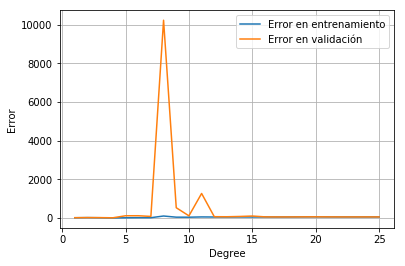

In [21]:
# Error por validación cruzada mínimo y grado entre 1,...,26 que lo obtiene
print("Error mímimo en validación ", np.min(results[0:,1]), "encontrado para grado = ", np.argmin(results[0:,1]) + 1)

plt.plot(np.arange(1,26), results[0:,0], label = "Error en entrenamiento")
plt.plot(np.arange(1,26), results[0:,1], label = "Error en validación")
plt.legend()
plt.grid(True)
plt.ylabel("Error")
plt.xlabel("Degree")
plt.show()

### Fitting a polynomial model with interactions
Ahora consideramos que puede haber interacciones entre los atributos. Esto se refleja en que ahora permitimos que haya terminos cruzados en las funciones polinómicas base. Para calcular dichas expansiones usamos PolynomialFeatures de scikit-learn. Preparamos el modelo.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
gmodel = linear_model.LinearRegression(fit_intercept = False)#, normalize = True)

In [33]:
# Sólo calculamos hasta el grado 5 pues el tiempo de ejecución para grados mayores incrementa rápidamente
# Se probó hasta el grado 11 y naturalmente el overfitting es muy grande a partir de d= 6
results = np.zeros(shape=(5,2))
for d in range(0,5):
    poly = PolynomialFeatures(d+1)
    pX = poly.fit_transform(X)
    gmodel.fit(pX,y)
    
    # Evaluation by cross-validation, k = 10
    a = cvk(gmodel, pX,y, 10)
    
    results[d][0] = a[0:,0].mean()/10
    results[d][1] = a[0:,1].mean()/10
    print("Grado: ",d+1)
    print("Error en entrenamiento:", results[d][0])
    print("Error en validación:", results[d][1])

Grado:  1
Error en entrenamiento: 2.1809869538420434
Error en validación: 2.365694572596552
Grado:  2
Error en entrenamiento: 0.5731057677852155
Error en validación: 1.7474871985382336
Grado:  3
Error en entrenamiento: 1.3551342029277742e-06
Error en validación: 3818791.0351105197
Grado:  4
Error en entrenamiento: 8.734318029396541e-21
Error en validación: 25477.25004568576
Grado:  5
Error en entrenamiento: 5.954229999929578e-20
Error en validación: 22958.36289473647


Error mínimo: 1.7474871985382336 para el grado  2


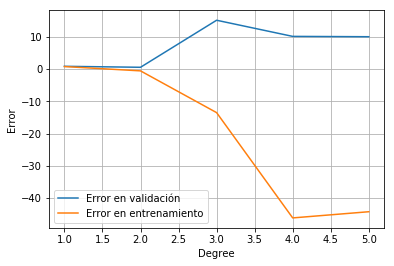

In [43]:
# Error mínimo y grado que lo obtiene
print("Error mínimo:", np.min(results[0:,1]), "para el grado ", np.argmin(results[0:,1]) + 1)

plt.plot(np.arange(1,6), [np.log(i) for i in results[0:,1]], label = "Error en validación")
plt.plot(np.arange(1,6), [np.log(i) for i in results[0:,0]], label = "Error en entrenamiento")
plt.legend()
plt.grid(True)
plt.ylabel("Error")
plt.xlabel("Degree")
plt.show()

Concluimos que el mejor modelo con interacciones es aquel con grado = 2.